# Online Selection of HLS Representations

In [1]:
from lrcb.bandits.multirep_finite import FiniteMultiBandit
from lrcb.representations.finite_representations import make_random_rep, hls_rank, rank, derank_hls, make_hls_rank
from lrcb.representations.finite_representations import is_cmb, is_hls, spans
from lrcb.algos.oful import oful
from lrcb.algos.lr_oful import select_oful
import math
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import lrcb.visualization.notebook_utils as nu

## Common settings

In [2]:
nc = 100
na = 5
dim = 20
noise = 0.1
seeds = range(10)

Generate original HLS representation

In [3]:
r0 = make_random_rep(nc, na, dim, normalize=True)
assert is_hls(r0)

OFUL settings

In [4]:
iterations = 1000
reg = 0.1
delta = 0.1
param_bound = 1. #Guaranteed by make_random_rep(..., normalize=True)

## CMB, destructive approach, same parameter

Generate non-HLS equivalent representations with varying HLS rank

In [5]:
reps = [derank_hls(r0, i, transform=False) for i in range(1, dim)]
reps.append(r0)

for i, r in enumerate(reps[:-1]):
    assert r == reps[-1] #All representations are equivalent
    assert np.allclose(r._param, reps[-1]._param) #with the same parameter!
    assert not is_hls(r) #Only the original one is HLS
    assert spans(r) #All representations still span R^d
    print('%d/%d %s' % (hls_rank(r), rank(r), '(CMB)' if is_cmb(r) else ''))
print('%d/%d %s' % (hls_rank(reps[-1]), rank(reps[-1]), '(CMB)' if is_cmb(r) else ''))

#Buldi multi-representation problem
problem = FiniteMultiBandit(nc, na, reps)

1/20 (CMB)
2/20 (CMB)
3/20 (CMB)
4/20 (CMB)
5/20 (CMB)
6/20 (CMB)
7/20 (CMB)
8/20 (CMB)
9/20 (CMB)
10/20 (CMB)
11/20 (CMB)
12/20 (CMB)
13/20 (CMB)
14/20 (CMB)
15/20 (CMB)
16/20 (CMB)
17/20 (CMB)
18/20 (CMB)
19/20 (CMB)
20/20 (CMB)


OFUL settings

In [6]:
iterations = 1000
reg = 0.1
delta = 0.1
param_bound = 1. #Guaranteed by make_random_rep(..., normalize=True)

Regret of OFUL with different representations

In [7]:
for i in range(len(reps)):
    problem.select_rep(i)
    name = 'oful_rank%d' % hls_rank(reps[i])
    for seed in seeds:
        oful(problem, iterations, reg, noise, delta, param_bound, seed=seed, verbose=False, logname=name)

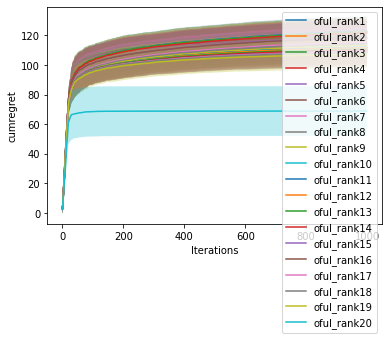

In [8]:
names = ['oful_rank%d' % (i+1) for i in range(dim)]
nu.compare('../logs', names, 'cumregret', seeds)

(Final) cumulated regret is (almost) sorted by hls rank, with the HLS representation having a large advantage

In [9]:
nu.tournament('../logs', names, 'cumregret', seeds)

[('oful_rank20', 68.89825994007242),
 ('oful_rank19', 107.30387403455067),
 ('oful_rank18', 108.47199748381709),
 ('oful_rank17', 108.95664198562676),
 ('oful_rank16', 108.98106790991521),
 ('oful_rank15', 109.29054770285828),
 ('oful_rank14', 110.22513732223506),
 ('oful_rank13', 110.81262685083941),
 ('oful_rank12', 111.6606435326509),
 ('oful_rank11', 111.91557094709246),
 ('oful_rank10', 112.11571504440894),
 ('oful_rank9', 113.13973853823673),
 ('oful_rank8', 114.4136870259811),
 ('oful_rank7', 115.45385509453334),
 ('oful_rank6', 118.37001205057507),
 ('oful_rank5', 118.68077040194505),
 ('oful_rank4', 121.58154187448312),
 ('oful_rank3', 122.23604572157835),
 ('oful_rank2', 122.29590992916977),
 ('oful_rank1', 122.83628126818982)]

Regret of model-selection algorithm compared to best model

In [10]:
for seed in seeds:
    select_oful(problem, iterations, reg, noise, delta, param_bound, seed=seed, verbose=False, logname='oful_select')

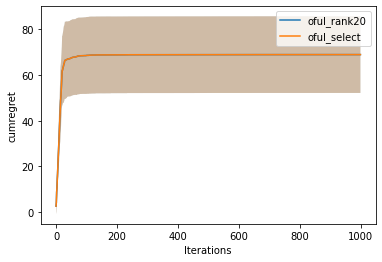

In [11]:
names = ['oful_rank%d' % dim, 'oful_select']
        
nu.compare('../logs', names, 'cumregret', seeds)

Representations selected by model-selection algorithm

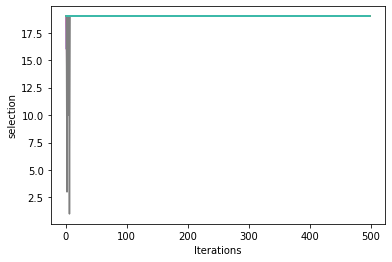

In [12]:
nu.plot_all('../logs', 'oful_select', 'selection', seeds, rows=500)

## CMB, destructive approach, different parameter

Re-use the same original HLS representation

Generate non-HLS **equivalent** representations with varying HLS rank **and different parameters**

In [13]:
reps = [derank_hls(r0, i, transform=True) for i in range(1, dim)] #Random transformation preserving equivalence
reps.append(r0)

for i, r in enumerate(reps[:-1]):
    assert r == reps[-1] #All representations are equivalent
    assert not np.allclose(r._param, reps[-1]._param) #But with different parameters!
    assert not is_hls(r) #Only the original one is HLS
    assert spans(r) #All representations still span R^d
    print('%d/%d %s' % (hls_rank(r), rank(r), '(CMB)' if is_cmb(r) else ''))
print('%d/%d %s' % (hls_rank(reps[-1]), rank(reps[-1]), '(CMB)' if is_cmb(r) else ''))

#Buldi multi-representation problem
problem = FiniteMultiBandit(nc, na, reps)

1/20 (CMB)
2/20 (CMB)
3/20 (CMB)
4/20 (CMB)
5/20 (CMB)
6/20 (CMB)
7/20 (CMB)
8/20 (CMB)
9/20 (CMB)
10/20 (CMB)
11/20 (CMB)
12/20 (CMB)
13/20 (CMB)
14/20 (CMB)
15/20 (CMB)
16/20 (CMB)
17/20 (CMB)
18/20 (CMB)
19/20 (CMB)
20/20 (CMB)


OFUL settings

In [14]:
iterations = 1000
reg = 0.1
delta = 0.1
param_bound = 1. #Guaranteed by make_random_rep(..., normalize=True)

Regret of OFUL with different representations

In [15]:
for i in range(len(reps)):
    problem.select_rep(i)
    name = 'oful_rank%d(t)' % hls_rank(reps[i])
    for seed in seeds:
        oful(problem, iterations, reg, noise, delta, param_bound, seed=seed, verbose=False, logname=name)

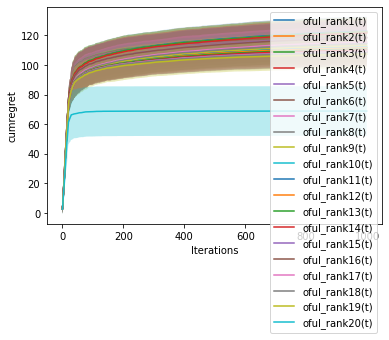

In [16]:
names = ['oful_rank%d(t)' % (i+1) for i in range(dim)]
nu.compare('../logs', names, 'cumregret', seeds)

(Final) cumulated regret is (almost) sorted by hls rank, with the HLS representation having a large advantage

In [17]:
nu.tournament('../logs', names, 'cumregret', seeds)

[('oful_rank20(t)', 68.89825994007242),
 ('oful_rank19(t)', 107.30387403455072),
 ('oful_rank18(t)', 108.4719974838169),
 ('oful_rank17(t)', 108.95664198562649),
 ('oful_rank16(t)', 108.98106790991558),
 ('oful_rank15(t)', 109.29054770285822),
 ('oful_rank14(t)', 110.22513732223499),
 ('oful_rank13(t)', 110.81262685083944),
 ('oful_rank12(t)', 111.66064353265101),
 ('oful_rank11(t)', 111.91557094709216),
 ('oful_rank10(t)', 112.11571504440897),
 ('oful_rank9(t)', 113.13973853823654),
 ('oful_rank8(t)', 114.41368702598102),
 ('oful_rank7(t)', 115.45385509453322),
 ('oful_rank6(t)', 118.370012050575),
 ('oful_rank5(t)', 118.68077040194476),
 ('oful_rank4(t)', 121.58154187448307),
 ('oful_rank3(t)', 122.23604572157828),
 ('oful_rank2(t)', 122.29590992916962),
 ('oful_rank1(t)', 122.8362812681899)]

Regret of model-selection algorithm compared to best model

In [18]:
for seed in seeds:
    select_oful(problem, iterations, reg, noise, delta, param_bound, seed=seed, verbose=False, logname='oful_select(t)')

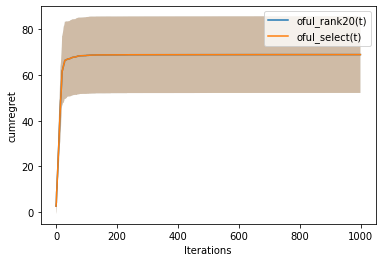

In [19]:
names = ['oful_rank%d(t)' % dim, 'oful_select(t)']
        
nu.compare('../logs', names, 'cumregret', seeds)

Representations selected by model-selection algorithm

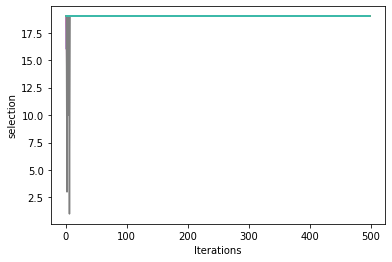

In [20]:
nu.plot_all('../logs', 'oful_select(t)', 'selection', seeds, rows=500)

## CMB, constructive approach (different parameter)

This time I construct a representation of the desired hls rank starting from (the same) reward function

In [21]:
y = r0._rewards

In [22]:
reps = [make_hls_rank(y, dim=dim, rank=i) for i in range(1, dim+1)]

for i, r in enumerate(reps):
    assert np.allclose(r._rewards, y)  #All representations are equivalent
    assert hls_rank(r) == i+1 #But with different HLS ranks
    assert spans(r) #All representations still span R^d
    print('%d/%d %s' % (hls_rank(r), rank(r), '(CMB)' if is_cmb(r) else ''))
    
#Buldi multi-representation problem
problem = FiniteMultiBandit(nc, na, reps)

1/20 (CMB)
2/20 (CMB)
3/20 (CMB)
4/20 (CMB)
5/20 (CMB)
6/20 (CMB)
7/20 (CMB)
8/20 (CMB)
9/20 (CMB)
10/20 (CMB)
11/20 (CMB)
12/20 (CMB)
13/20 (CMB)
14/20 (CMB)
15/20 (CMB)
16/20 (CMB)
17/20 (CMB)
18/20 (CMB)
19/20 (CMB)
20/20 (CMB)


Regret of OFUL with different representations

In [23]:
for i in range(len(reps)):
    problem.select_rep(i)
    name = 'oful_rank%d(c)' % hls_rank(reps[i])
    for seed in seeds:
        oful(problem, iterations, reg, noise, delta, param_bound, seed=seed, verbose=False, logname=name)

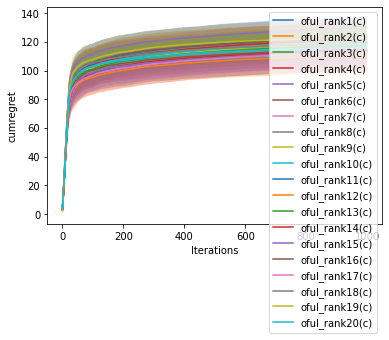

In [24]:
names = ['oful_rank%d(c)' % (i+1) for i in range(dim)]
nu.compare('../logs', names, 'cumregret', seeds)

(Final) cumulated regret

In [25]:
nu.tournament('../logs', names, 'cumregret', seeds)

[('oful_rank12(c)', 110.7983651433339),
 ('oful_rank17(c)', 112.65368034880055),
 ('oful_rank15(c)', 112.77471195032042),
 ('oful_rank11(c)', 113.2472868941469),
 ('oful_rank14(c)', 114.13137627715733),
 ('oful_rank7(c)', 114.20381933035063),
 ('oful_rank16(c)', 114.77786908758858),
 ('oful_rank20(c)', 116.13333763004923),
 ('oful_rank13(c)', 117.44386578941484),
 ('oful_rank18(c)', 118.96821383478225),
 ('oful_rank9(c)', 119.0344830500613),
 ('oful_rank8(c)', 119.30062656834244),
 ('oful_rank2(c)', 119.6463582422291),
 ('oful_rank3(c)', 119.72849814469805),
 ('oful_rank10(c)', 119.98084997122649),
 ('oful_rank4(c)', 122.07847160513163),
 ('oful_rank6(c)', 122.88882215105029),
 ('oful_rank19(c)', 122.90443314206887),
 ('oful_rank1(c)', 123.77822703465236),
 ('oful_rank5(c)', 129.78717358432567)]

Regret of model-selection algorithm compared to best model

In [26]:
for seed in seeds:
    select_oful(problem, iterations, reg, noise, delta, param_bound, seed=seed, verbose=False, logname='oful_select(c)')

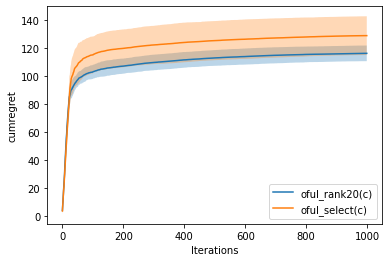

In [27]:
names = ['oful_rank%d(c)' % dim, 'oful_select(c)']
        
nu.compare('../logs', names, 'cumregret', seeds)

Representations selected by model-selection algorithm

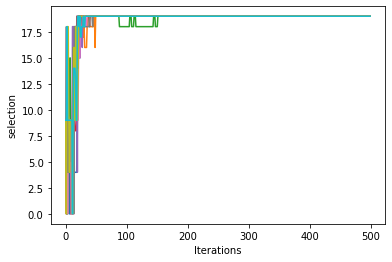

In [28]:
nu.plot_all('../logs', 'oful_select(c)', 'selection', seeds, rows=500)